## Transition to first develop robust method for traversing directories recursively and clustering common file names

In [3]:
import glob
import os
import pandas as pd
import re
import jellyfish

In [4]:
for root, dirs, files in os.walk(r'Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018'):
    if root != []: print('root: {}'.format(root))
    if dirs != []:
        print('    dirs:')
        for i in dirs:
            print('        {}'.format(i))
    if files != []:
        print('            files:')
        for j in files:
            print('                {}'.format(j))

root: Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018
    dirs:
        Q1
        Q2
        Q3
        Q4
root: Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1
    dirs:
        Received
            files:
                Contact list Q1 2018.xlsx
                Q1 2018-Quarterly Mutual Fund Survey.xlsx
                Survey Tracker.xlsx
root: Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received
    dirs:
        AGF
        AVISO
        BMO
        Bridgehouse
        CI
        CIBC
        Desjardins
        Dynamic
        Fidelity
        FTI
        HSBC
        IG
        Invesco
        Mackenzie
        Manulife
        National Bank
        PIMCO
        RBC
        Russell
        Scotia
        TD
            files:
                Q1 2018 Assets.xlsx
                Q1 2018 RedGr.xlsx
root: Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\AGF
            files:
                AGF Q1 2018-Quarterly Mutual Fund Survey Inquiries.xlsx
       

In [5]:
a = os.walk(r'Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018')

In [98]:
list(a)

['Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Contact list Q1 2018.xlsx',
 'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Q1 2018-Quarterly Mutual Fund Survey.xlsx',
 'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Survey Tracker.xlsx',
 'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\Q1 2018 Assets.xlsx',
 'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\Q1 2018 RedGr.xlsx',
 'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\AGF\\AGF Q1 2018-Quarterly Mutual Fund Survey Inquiries.xlsx',
 'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\AGF\\AGF Q1 2018-Quarterly Mutual Fund Survey.xlsx',
 'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\AVISO\\AVISO Q1 2018-Quarterly Mutual Fund Survey Inquiries.xlsx',
 'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\AVISO\\AVISO Q1 2018-Quarterly Mutual Fund Survey.xlsx',
 'Z:\\Data\\Su

In [6]:
def file_search(dirpath):
    '''
    Recursively walks the dirpath and creates a list of all
    files. Clusters files by similarity and outputs a list
    of the most prevalent cluster.
    '''
    file_paths = []
    for root, dirs, files in os.walk(dirpath):
        for filename in files:
            file_paths.append(os.path.join(root,filename))
    return file_paths

In [7]:
test = r'Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018'

In [8]:
a = file_search(test)

## Hardcode list of files to play with at home:

In [18]:
for i in a:
    print(i)

Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Contact list Q1 2018.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Q1 2018-Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Survey Tracker.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\Q1 2018 Assets.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\Q1 2018 RedGr.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\AGF\AGF Q1 2018-Quarterly Mutual Fund Survey Inquiries.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\AGF\AGF Q1 2018-Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\AVISO\AVISO Q1 2018-Quarterly Mutual Fund Survey Inquiries.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\AVISO\AVISO Q1 2018-Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\AVISO\RE Quarterly mutual fund survey - provincial d

In [10]:
hardc = r'''Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Contact list Q1 2018.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Q1 2018-Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Survey Tracker.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\Q1 2018 Assets.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\Q1 2018 RedGr.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\AGF\AGF Q1 2018-Quarterly Mutual Fund Survey Inquiries.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\AGF\AGF Q1 2018-Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\AVISO\AVISO Q1 2018-Quarterly Mutual Fund Survey Inquiries.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\AVISO\AVISO Q1 2018-Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\AVISO\RE Quarterly mutual fund survey - provincial data inquiries.msg
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\BMO\2018_Q1 - BMO Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\Bridgehouse\Bridgehouse Q1 2018-Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\CI\Q1_2018_All_CI_Brands.xls
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\CIBC\CIBC Template Q1 2018.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\CIBC\Copy of Q1 2018 - CIBC Quarterly Mutual Fund Survey.xls
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\CIBC\Copy of Q1 2018 - Renaissance Quarterly Mutual Fund Survey HC.xls
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\Desjardins\Desjardins Q1 2018-Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\Dynamic\Dynamic Q1 2018-Quarterly Mutual Fund Survey (002).xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\Fidelity\Fidelity Quarterly_Provincial_MF_Survey (002).xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\FTI\FTI Q1 2018-Quarterly Mutual Fund Survey Inquiries.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\FTI\FTI Q1 2018-Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\HSBC\HSBC Q1 2018-Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\IG\Investors Group Q1 2018 Quarterly Mutual Fund Survey Inquiries.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\IG\Investors Group Q1 2018 Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\Invesco\Invesco Quarterly Mutual Fund Survey 2018-Q1.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\Mackenzie\Mackenzie Q1 2018-Quarterly Mutual Fund Survey Inquiries.xls
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\Mackenzie\Mackenzie Q1 2018-Quarterly Mutual Fund Survey.xls
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\Manulife\Manulife Q1 2018-Quarterly Mutual Fund Survey Inquiries.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\Manulife\Manulife Q1 2018-Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\Manulife\Q1 2018-Quarterly Mutual Fund Survey(Revised).xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\Manulife\RE Quarterly mutual fund survey - provincial data inquiries.msg
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\National Bank\NB Q1 2018-Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\PIMCO\PIMCO Q1 2018-Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\RBC\RBC Q1 2018 - Qtrly MF Survey - FINAL.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\Russell\Russell Q1 2018-Quarterly Mutual Fund Survey (003).xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\Scotia\Scotia Q1 2018-Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\TD\REVISED 2018 Q1 SERIES DATA.xls
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q1\Received\TD\TD 2018 Q1 Provincial MF Survey.xls
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Q2 2018-Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Survey Tracker.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\Q2 2018 Assets.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\Q2 2018 RedGr.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\AGF\AGF Q2 2018-Quarterly Mutual Fund Survey (008).xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\AVISO\AVISO Q2 2018-Quarterly Mutual Fund Survey (002).xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\BMO\BMO 2018_Q2 - Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\Bridgehouse\Bridgehouse Q2 2018-Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\Bridgehouse\FW Strategic Insight Quarterly Mutual Funds Survey Q2 2018.msg
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\CI\Investor_Economics_Q2_2018_All_CI_Brands.xls
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\CIBC\CIBC Template Q2 2018.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\CIBC\Copy of Q2 2018 - CIBC Quarterly Mutual Fund Survey.xls
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\CIBC\Copy of Q2 2018 - Renaissance Quarterly Mutual Fund Survey HC.xls
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\Desjardins\Desjardins Q2 2018-Quarterly Mutual Fund Survey (005).xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\Dynamic\Dynamic Q2 2018-Quarterly Mutual Fund Survey (007).xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\Fidelity\Fidelity Quarterly_Provincial_MF_Survey Q2 2018.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\FTI\Q2 2018-Quarterly Mutual Fund Survey - FT.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\HSBC\HSBC Q2 2018-Quarterly Mutual Fund Survey (009).xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\IG\IG Q2 2018 Quarterly Mutual Fund Survey inquiries.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\IG\IG Q2 2018 Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\Invesco\Invesco Quarterly Mutual Fund Survey 2018-Q2.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\Invesco\Invesco Quarterly Mutual Fund Survey 2018-Q2v2.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\Mackenzie\Mackenzie Q2 2018-Quarterly Mutual Fund Survey Inquiries.xls
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\Mackenzie\Mackenzie Q2 2018-Quarterly Mutual Fund Survey.xls
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\Mackenzie\RE Quarterly mutual fund survey inquiries.msg
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\Mackenzie\Revisions\Q1 2018-Quarterly Mutual Fund Survey V2.xls
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\Mackenzie\Revisions\Q2 2018-Quarterly Mutual Fund Survey V2.xls
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\Manulife\Manulife 2018-Q2-Quarterly Mutual Fund Survey Inquiries.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\Manulife\Manulife 2018-Q2-Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\National Bank\NB Q2 2018-Quarterly Mutual Fund Survey (004).xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\PIMCO\PIMCO Q2 2018-Quarterly Mutual Fund Survey (00A).xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\PIMCO\PIMCO Q2 2018-Quarterly Mutual Fund Survey Inquiries.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\PIMCO\Q2 2018-Quarterly Mutual Fund Survey (Revised).xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\PIMCO\RE Quarterly mutual fund survey inquiries.msg
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\RBC\RBC 06 Q2 2018 - Qtrly MF Survey - FINAL.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\Russel\Russell Q2 2018-Quarterly Mutual Fund Survey (006).xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\Scotia\Scotia Q2 2018-Quarterly Mutual Fund Survey (003).xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q2\Received\TD\TD 2018 Q2 Provincial MF Survey.xls
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q3\Q3 2018-Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q3\Received\Q3 2018 Assets.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q3\Received\Q3 2018 RedGr.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q3\Received\AGF\AGF Q3 2018-Quarterly Mutual Fund Survey Inquiries.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q3\Received\AGF\AGF Q3 2018-Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q3\Received\AVISO\AVISO Q3 2018-Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q3\Received\BMO\BMO 2018_Q3 - Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q3\Received\Bridgehouse\Bridgehouse Q3 2018-Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q3\Received\CI\Q3_2018_All_CI_Brands Inquiries.xls
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q3\Received\CI\Q3_2018_All_CI_Brands.xls
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q3\Received\CIBC\CIBC Template Q3 2018.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q3\Received\CIBC\Q3 2018 - CIBC Quarterly Mutual Fund Survey.xls
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q3\Received\CIBC\Q3 2018 - Renaissance Quarterly Mutual Fund Survey HC.xls
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q3\Received\Desjardins\Desjardins Q3 2018-Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q3\Received\Fidelity\Fidelity Quarterly_Provincial_MF_Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q3\Received\FTI\FTI Q3 2018-Quarterly Mutual Fund Survey Inquiries.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q3\Received\FTI\FTI Q3 2018-Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q3\Received\HSBC\HSBC Q3 2018-Quarterly Mutual Fund Survey Inquiries.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q3\Received\HSBC\HSBC Q3 2018-Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q3\Received\IG\IG Q3 2018 Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q3\Received\Invesco\Invesco Quarterly Mutual Fund Survey 2018-Q3.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q3\Received\Mackenzie\FW Strategic Insight Quarterly Mutual Funds Survey Q3 2018.msg
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q3\Received\Mackenzie\Mackenzie Q3 2018-Quarterly Mutual Fund Survey.xls
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q3\Received\Mackenzie\Q3 2018-Quarterly Mutual Fund Survey (Revised).xls
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q3\Received\Manulife\Manulife 2018-Q3-Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q3\Received\National Bank\NB Q3 2018-Quarterly Mutual Fund Survey (006).xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q3\Received\PIMCO\PIMCO Q3 2018-Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q3\Received\RBC\RBC 06 Q3 2018 - Qtrly MF Survey - FINAL.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q3\Received\Russel\Russell Q3 2018-Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q3\Received\Scotia\Scotia Q3 2018-Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q3\Received\TD\TD 2018 Q3 Provincial MF Survey.xls
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q4\Contact list Q4 2018.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q4\Q4 2018-Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q4\Received\Q3 2018 Assets.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q4\Received\Q3 2018 RedGr.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q4\Received\BMO\BMO 2018_Q4 - Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q4\Received\Bridgehouse\Bridgehouse Q4 2018-Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q4\Received\CI\Investor_Economics_Q4_2018_All_CI_Brands.xls
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q4\Received\CIBC\Q4 2018 - CIBC Quarterly Mutual Fund Survey.xls
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q4\Received\CIBC\Q4 2018 - Renaissance Quarterly Mutual Fund Survey HC.XLS
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q4\Received\Fidelity\Fidelity Quarterly_Provincial_MF_Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q4\Received\HSBC\HSBC Q4 2018-Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q4\Received\IG\IG Q4 2018 Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q4\Received\Invesco\Invesco Quarterly Mutual Fund Survey 2018-Q4.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q4\Received\Mackenzie\Mackenzie Q4 2018-Quarterly Mutual Fund Survey Final.xls
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q4\Received\Manulife\Manulife 2018-Q4-Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q4\Received\NEI\NEI Q4 2018-Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q4\Received\PIMCO\PIMCO Q4 2018-Quarterly Mutual Fund Survey (002).xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q4\Received\Russel\Russell Q4 2018-Quarterly Mutual Fund Survey.xlsx
Z:\Data\Surveys\Quarterly Mutual Fund Survey\2018\Q4\Received\TD\TD 2018 Q4 Provincial MF Survey.xls'''.split('\n')

## Implement similarity metrics to cluster file names

In [19]:
import numpy as np

Approach: build a pairwise comparison matrix for j>i (else null). After algorithm is built, attempt to apply the similarity metric to the pairs as they are being constructed. Result is an upper triangular matrix with (hopefully) some linear boundary x.

Itertools has a function for pairwise combinations:

In [28]:
import itertools

In [31]:
list(itertools.combinations(['a','b','c'], 2))

[('a', 'b'), ('a', 'c'), ('b', 'c')]

This function creates a pairwise list, rather than a matrix.

In [48]:
combinations = list(itertools.combinations(hardc,2))

Apply the similarity metrics to each tuple in the pairwise combinations:

In [50]:
ld = [jellyfish.levenshtein_distance(i[0],i[1]) for i in combinations]

### Visualize distribution of measures 

In [53]:
import seaborn as sns
sns.set()

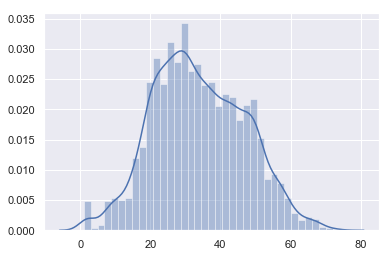

In [55]:
sns.distplot(ld)

It looks like the levenshtein distance metric produces a fairly continuous distribution that would not be easy to segment linearly. 

One potential continuation of this approach would be to examine some clustering methods, and perhaps create more features by applying other similarity metrics to the pairwise combinations. These higher dimensional datapoints may be easier to classify.

### Continuation with k-means on raw strings (no feature engineering)

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [63]:
hardc[:4]

['Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Contact list Q1 2018.xlsx',
 'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Q1 2018-Quarterly Mutual Fund Survey.xlsx',
 'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Survey Tracker.xlsx',
 'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\Q1 2018 Assets.xlsx']

In [64]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(hardc)

true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=2, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [66]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 bridgehouse
 msg
 survey
 mutual
 quarterly
 fund
 2018
 inquiries
 q2
 data
Cluster 1:
 2018
 survey
 mutual
 fund
 quarterly
 q1
 q2
 q3
 data
 surveys


The above categorization seems very unpromising. The strings are very similar for a large portion of the beginning and the end of the string.

In [97]:
for i in range(len(hardc)):
    print('[{}]        '.format(str(model.labels_[i])) + hardc[i][50:])

[1]        Q1\Contact list Q1 2018.xlsx
[1]        Q1\Q1 2018-Quarterly Mutual Fund Survey.xlsx
[1]        Q1\Survey Tracker.xlsx
[1]        Q1\Received\Q1 2018 Assets.xlsx
[1]        Q1\Received\Q1 2018 RedGr.xlsx
[1]        Q1\Received\AGF\AGF Q1 2018-Quarterly Mutual Fund Survey Inquiries.xlsx
[1]        Q1\Received\AGF\AGF Q1 2018-Quarterly Mutual Fund Survey.xlsx
[1]        Q1\Received\AVISO\AVISO Q1 2018-Quarterly Mutual Fund Survey Inquiries.xlsx
[1]        Q1\Received\AVISO\AVISO Q1 2018-Quarterly Mutual Fund Survey.xlsx
[0]        Q1\Received\AVISO\RE Quarterly mutual fund survey - provincial data inquiries.msg
[1]        Q1\Received\BMO\2018_Q1 - BMO Quarterly Mutual Fund Survey.xlsx
[0]        Q1\Received\Bridgehouse\Bridgehouse Q1 2018-Quarterly Mutual Fund Survey.xlsx
[1]        Q1\Received\CI\Q1_2018_All_CI_Brands.xls
[1]        Q1\Received\CIBC\CIBC Template Q1 2018.xlsx
[1]        Q1\Received\CIBC\Copy of Q1 2018 - CIBC Quarterly Mutual Fund Survey.xls
[1]        Q1\Rec

We can see above that the k-means clustering on the strings does not do a good job of differentiating out the files we want.

## Alternative approach 

A case specific set of rules could be hard coded to pick out file names of interest using regex:

## A further approach

One realization is that the files we want can be identified in the context of their position within the file tree. The idea is that files on the save level of a tree are probably similar. Thus attempting to work with a flat list of all file names actually reduces important contextual information.

In [192]:
def dir_to_lists(path):
    '''
    Some baller recursion in a 
    list comprehension to return
    a list of lists representation
    of a particular directory.
    '''
    dirs = os.listdir(path)
    return [dir_to_lists(path + r'\{}'.format(item)) if os.path.isdir(path + r'\{}'.format(item)) else item for item in dirs]
      
            

In [193]:
dir_to_lists(test)

[['Contact list Q1 2018.xlsx',
  'Q1 2018-Quarterly Mutual Fund Survey.xlsx',
  [['AGF Q1 2018-Quarterly Mutual Fund Survey Inquiries.xlsx',
    'AGF Q1 2018-Quarterly Mutual Fund Survey.xlsx'],
   ['AVISO Q1 2018-Quarterly Mutual Fund Survey Inquiries.xlsx',
    'AVISO Q1 2018-Quarterly Mutual Fund Survey.xlsx',
    'RE Quarterly mutual fund survey - provincial data inquiries.msg'],
   ['2018_Q1 - BMO Quarterly Mutual Fund Survey.xlsx'],
   ['Bridgehouse Q1 2018-Quarterly Mutual Fund Survey.xlsx'],
   ['Q1_2018_All_CI_Brands.xls'],
   ['CIBC Template Q1 2018.xlsx',
    'Copy of Q1 2018 - CIBC Quarterly Mutual Fund Survey.xls',
    'Copy of Q1 2018 - Renaissance Quarterly Mutual Fund Survey HC.xls'],
   ['Desjardins Q1 2018-Quarterly Mutual Fund Survey.xlsx'],
   ['Dynamic Q1 2018-Quarterly Mutual Fund Survey (002).xlsx'],
   ['Fidelity Quarterly_Provincial_MF_Survey (002).xlsx'],
   ['FTI Q1 2018-Quarterly Mutual Fund Survey Inquiries.xlsx',
    'FTI Q1 2018-Quarterly Mutual Fund Surv

In [198]:
def dir_to_dicts(path):
    '''
    Some baller recursion in a 
    list comprehension with dict
    key to directory name to return
    a dict of dict and list
    representation
    of a particular directory.
    '''
    dirs = os.listdir(path)
    return {path:[dir_to_dicts(path + r'\{}'.format(item)) if os.path.isdir(path + r'\{}'.format(item)) else item for item in dirs]}
            

In [201]:
dir_to_dicts(test)

{'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018': [{'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1': ['Contact list Q1 2018.xlsx',
    'Q1 2018-Quarterly Mutual Fund Survey.xlsx',
    {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received': [{'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\AGF': ['AGF Q1 2018-Quarterly Mutual Fund Survey Inquiries.xlsx',
        'AGF Q1 2018-Quarterly Mutual Fund Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\AVISO': ['AVISO Q1 2018-Quarterly Mutual Fund Survey Inquiries.xlsx',
        'AVISO Q1 2018-Quarterly Mutual Fund Survey.xlsx',
        'RE Quarterly mutual fund survey - provincial data inquiries.msg']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\BMO': ['2018_Q1 - BMO Quarterly Mutual Fund Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\Bridgehouse': ['Bridgehouse Q1

In [202]:
a = dir_to_dicts(test)

In [203]:
a

{'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018': [{'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1': ['Contact list Q1 2018.xlsx',
    'Q1 2018-Quarterly Mutual Fund Survey.xlsx',
    {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received': [{'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\AGF': ['AGF Q1 2018-Quarterly Mutual Fund Survey Inquiries.xlsx',
        'AGF Q1 2018-Quarterly Mutual Fund Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\AVISO': ['AVISO Q1 2018-Quarterly Mutual Fund Survey Inquiries.xlsx',
        'AVISO Q1 2018-Quarterly Mutual Fund Survey.xlsx',
        'RE Quarterly mutual fund survey - provincial data inquiries.msg']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\BMO': ['2018_Q1 - BMO Quarterly Mutual Fund Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\Bridgehouse': ['Bridgehouse Q1

In [205]:
# hardcode for home usage
newhardc = {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018': [{'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1': ['Contact list Q1 2018.xlsx',
    'Q1 2018-Quarterly Mutual Fund Survey.xlsx',
    {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received': [{'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\AGF': ['AGF Q1 2018-Quarterly Mutual Fund Survey Inquiries.xlsx',
        'AGF Q1 2018-Quarterly Mutual Fund Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\AVISO': ['AVISO Q1 2018-Quarterly Mutual Fund Survey Inquiries.xlsx',
        'AVISO Q1 2018-Quarterly Mutual Fund Survey.xlsx',
        'RE Quarterly mutual fund survey - provincial data inquiries.msg']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\BMO': ['2018_Q1 - BMO Quarterly Mutual Fund Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\Bridgehouse': ['Bridgehouse Q1 2018-Quarterly Mutual Fund Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\CI': ['Q1_2018_All_CI_Brands.xls']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\CIBC': ['CIBC Template Q1 2018.xlsx',
        'Copy of Q1 2018 - CIBC Quarterly Mutual Fund Survey.xls',
        'Copy of Q1 2018 - Renaissance Quarterly Mutual Fund Survey HC.xls']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\Desjardins': ['Desjardins Q1 2018-Quarterly Mutual Fund Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\Dynamic': ['Dynamic Q1 2018-Quarterly Mutual Fund Survey (002).xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\Fidelity': ['Fidelity Quarterly_Provincial_MF_Survey (002).xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\FTI': ['FTI Q1 2018-Quarterly Mutual Fund Survey Inquiries.xlsx',
        'FTI Q1 2018-Quarterly Mutual Fund Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\HSBC': ['HSBC Q1 2018-Quarterly Mutual Fund Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\IG': ['Investors Group Q1 2018 Quarterly Mutual Fund Survey Inquiries.xlsx',
        'Investors Group Q1 2018 Quarterly Mutual Fund Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\Invesco': ['Invesco Quarterly Mutual Fund Survey 2018-Q1.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\Mackenzie': ['Mackenzie Q1 2018-Quarterly Mutual Fund Survey Inquiries.xls',
        'Mackenzie Q1 2018-Quarterly Mutual Fund Survey.xls']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\Manulife': ['Manulife Q1 2018-Quarterly Mutual Fund Survey Inquiries.xlsx',
        'Manulife Q1 2018-Quarterly Mutual Fund Survey.xlsx',
        'Q1 2018-Quarterly Mutual Fund Survey(Revised).xlsx',
        'RE Quarterly mutual fund survey - provincial data inquiries.msg']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\National Bank': ['NB Q1 2018-Quarterly Mutual Fund Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\PIMCO': ['PIMCO Q1 2018-Quarterly Mutual Fund Survey.xlsx']},
      'Q1 2018 Assets.xlsx',
      'Q1 2018 RedGr.xlsx',
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\RBC': ['RBC Q1 2018 - Qtrly MF Survey - FINAL.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\Russell': ['Russell Q1 2018-Quarterly Mutual Fund Survey (003).xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\Scotia': ['Scotia Q1 2018-Quarterly Mutual Fund Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q1\\Received\\TD': ['REVISED 2018 Q1 SERIES DATA.xls',
        'TD 2018 Q1 Provincial MF Survey.xls']}]},
    'Survey Tracker.xlsx']},
  {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q2': ['Q2 2018-Quarterly Mutual Fund Survey.xlsx',
    {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q2\\Received': [{'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q2\\Received\\AGF': ['AGF Q2 2018-Quarterly Mutual Fund Survey (008).xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q2\\Received\\AVISO': ['AVISO Q2 2018-Quarterly Mutual Fund Survey (002).xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q2\\Received\\BMO': ['BMO 2018_Q2 - Quarterly Mutual Fund Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q2\\Received\\Bridgehouse': ['Bridgehouse Q2 2018-Quarterly Mutual Fund Survey.xlsx',
        'FW Strategic Insight Quarterly Mutual Funds Survey Q2 2018.msg']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q2\\Received\\CI': ['Investor_Economics_Q2_2018_All_CI_Brands.xls']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q2\\Received\\CIBC': ['CIBC Template Q2 2018.xlsx',
        'Copy of Q2 2018 - CIBC Quarterly Mutual Fund Survey.xls',
        'Copy of Q2 2018 - Renaissance Quarterly Mutual Fund Survey HC.xls']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q2\\Received\\Desjardins': ['Desjardins Q2 2018-Quarterly Mutual Fund Survey (005).xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q2\\Received\\Dynamic': ['Dynamic Q2 2018-Quarterly Mutual Fund Survey (007).xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q2\\Received\\Fidelity': ['Fidelity Quarterly_Provincial_MF_Survey Q2 2018.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q2\\Received\\FTI': ['Q2 2018-Quarterly Mutual Fund Survey - FT.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q2\\Received\\HSBC': ['HSBC Q2 2018-Quarterly Mutual Fund Survey (009).xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q2\\Received\\IG': ['IG Q2 2018 Quarterly Mutual Fund Survey inquiries.xlsx',
        'IG Q2 2018 Quarterly Mutual Fund Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q2\\Received\\Invesco': ['Invesco Quarterly Mutual Fund Survey 2018-Q2.xlsx',
        'Invesco Quarterly Mutual Fund Survey 2018-Q2v2.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q2\\Received\\Mackenzie': ['Mackenzie Q2 2018-Quarterly Mutual Fund Survey Inquiries.xls',
        'Mackenzie Q2 2018-Quarterly Mutual Fund Survey.xls',
        'RE Quarterly mutual fund survey inquiries.msg',
        {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q2\\Received\\Mackenzie\\Revisions': ['Q1 2018-Quarterly Mutual Fund Survey V2.xls',
          'Q2 2018-Quarterly Mutual Fund Survey V2.xls']}]},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q2\\Received\\Manulife': ['Manulife 2018-Q2-Quarterly Mutual Fund Survey Inquiries.xlsx',
        'Manulife 2018-Q2-Quarterly Mutual Fund Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q2\\Received\\National Bank': ['NB Q2 2018-Quarterly Mutual Fund Survey (004).xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q2\\Received\\PIMCO': ['PIMCO Q2 2018-Quarterly Mutual Fund Survey (00A).xlsx',
        'PIMCO Q2 2018-Quarterly Mutual Fund Survey Inquiries.xlsx',
        'Q2 2018-Quarterly Mutual Fund Survey (Revised).xlsx',
        'RE Quarterly mutual fund survey inquiries.msg']},
      'Q2 2018 Assets.xlsx',
      'Q2 2018 RedGr.xlsx',
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q2\\Received\\RBC': ['RBC 06 Q2 2018 - Qtrly MF Survey - FINAL.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q2\\Received\\Russel': ['Russell Q2 2018-Quarterly Mutual Fund Survey (006).xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q2\\Received\\Scotia': ['Scotia Q2 2018-Quarterly Mutual Fund Survey (003).xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q2\\Received\\TD': ['TD 2018 Q2 Provincial MF Survey.xls']}]},
    'Survey Tracker.xlsx']},
  {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q3': ['Q3 2018-Quarterly Mutual Fund Survey.xlsx',
    {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q3\\Received': [{'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q3\\Received\\AGF': ['AGF Q3 2018-Quarterly Mutual Fund Survey Inquiries.xlsx',
        'AGF Q3 2018-Quarterly Mutual Fund Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q3\\Received\\AVISO': ['AVISO Q3 2018-Quarterly Mutual Fund Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q3\\Received\\BMO': ['BMO 2018_Q3 - Quarterly Mutual Fund Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q3\\Received\\Bridgehouse': ['Bridgehouse Q3 2018-Quarterly Mutual Fund Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q3\\Received\\CI': ['Q3_2018_All_CI_Brands Inquiries.xls',
        'Q3_2018_All_CI_Brands.xls']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q3\\Received\\CIBC': ['CIBC Template Q3 2018.xlsx',
        'Q3 2018 - CIBC Quarterly Mutual Fund Survey.xls',
        'Q3 2018 - Renaissance Quarterly Mutual Fund Survey HC.xls']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q3\\Received\\Desjardins': ['Desjardins Q3 2018-Quarterly Mutual Fund Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q3\\Received\\Fidelity': ['Fidelity Quarterly_Provincial_MF_Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q3\\Received\\FTI': ['FTI Q3 2018-Quarterly Mutual Fund Survey Inquiries.xlsx',
        'FTI Q3 2018-Quarterly Mutual Fund Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q3\\Received\\HSBC': ['HSBC Q3 2018-Quarterly Mutual Fund Survey Inquiries.xlsx',
        'HSBC Q3 2018-Quarterly Mutual Fund Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q3\\Received\\IG': ['IG Q3 2018 Quarterly Mutual Fund Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q3\\Received\\Invesco': ['Invesco Quarterly Mutual Fund Survey 2018-Q3.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q3\\Received\\Mackenzie': ['FW Strategic Insight Quarterly Mutual Funds Survey Q3 2018.msg',
        'Mackenzie Q3 2018-Quarterly Mutual Fund Survey.xls',
        'Q3 2018-Quarterly Mutual Fund Survey (Revised).xls']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q3\\Received\\Manulife': ['Manulife 2018-Q3-Quarterly Mutual Fund Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q3\\Received\\National Bank': ['NB Q3 2018-Quarterly Mutual Fund Survey (006).xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q3\\Received\\PIMCO': ['PIMCO Q3 2018-Quarterly Mutual Fund Survey.xlsx']},
      'Q3 2018 Assets.xlsx',
      'Q3 2018 RedGr.xlsx',
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q3\\Received\\RBC': ['RBC 06 Q3 2018 - Qtrly MF Survey - FINAL.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q3\\Received\\Russel': ['Russell Q3 2018-Quarterly Mutual Fund Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q3\\Received\\Scotia': ['Scotia Q3 2018-Quarterly Mutual Fund Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q3\\Received\\TD': ['TD 2018 Q3 Provincial MF Survey.xls']}]}]},
  {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q4': ['Contact list Q4 2018.xlsx',
    'Q4 2018-Quarterly Mutual Fund Survey.xlsx',
    {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q4\\Received': ['AGF Q4 2018-Quarterly Mutual Fund Survey.xlsx',
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q4\\Received\\BMO': ['BMO 2018_Q4 - Quarterly Mutual Fund Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q4\\Received\\Bridgehouse': ['Bridgehouse Q4 2018-Quarterly Mutual Fund Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q4\\Received\\CI': ['Investor_Economics_Q4_2018_All_CI_Brands.xls']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q4\\Received\\CIBC': ['Q4 2018 - CIBC Quarterly Mutual Fund Survey.xls',
        'Q4 2018 - Renaissance Quarterly Mutual Fund Survey HC.XLS']},
      'Desjardins Q4 2018-Quarterly Mutual Fund Survey (002).xlsx',
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q4\\Received\\Fidelity': ['Fidelity Quarterly_Provincial_MF_Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q4\\Received\\HSBC': ['HSBC Q4 2018-Quarterly Mutual Fund Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q4\\Received\\IG': ['IG Q4 2018 Quarterly Mutual Fund Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q4\\Received\\Invesco': ['Invesco Quarterly Mutual Fund Survey 2018-Q4.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q4\\Received\\Mackenzie': ['Mackenzie Q4 2018-Quarterly Mutual Fund Survey Final.xls']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q4\\Received\\Manulife': ['Manulife 2018-Q4-Quarterly Mutual Fund Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q4\\Received\\NEI': ['NEI Q4 2018-Quarterly Mutual Fund Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q4\\Received\\PIMCO': ['PIMCO Q4 2018-Quarterly Mutual Fund Survey (002).xlsx']},
      'Q3 2018 Assets.xlsx',
      'Q3 2018 RedGr.xlsx',
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q4\\Received\\Russel': ['Russell Q4 2018-Quarterly Mutual Fund Survey.xlsx']},
      {'Z:\\Data\\Surveys\\Quarterly Mutual Fund Survey\\2018\\Q4\\Received\\TD': ['TD 2018 Q4 Provincial MF Survey.xls']}]}]}]}